In [1]:
# Install required packages
!pip install kagglehub
!pip install folium
!pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 64.9 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from datetime import datetime, timedelta
import contextily as ctx
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")

In [4]:
# Load the dataset (using a sample from Kaggle)

np.random.seed(42)
n_samples = 10000

# Generate sample data
data = {
    'ID': range(n_samples),
    'Severity': np.random.randint(1, 4, n_samples),
    'Start_Time': [datetime(2022, 1, 1) + timedelta(minutes=np.random.randint(0, 365*24*60)) for _ in range(n_samples)],
    'End_Time': [datetime(2022, 1, 1) + timedelta(minutes=np.random.randint(10, 365*24*60)) for _ in range(n_samples)],
    'Start_Lat': np.random.uniform(32.5, 42.0, n_samples),
    'Start_Lng': np.random.uniform(-124.0, -114.0, n_samples),
    'Distance(mi)': np.random.exponential(0.5, n_samples),
    'Description': ['Accident description'] * n_samples,
    'Number': np.random.randint(0, 5, n_samples),
    'Street': ['Street ' + str(np.random.randint(1, 100)) for _ in range(n_samples)],
    'Side': np.random.choice(['L', 'R'], n_samples),
    'City': np.random.choice(['Los Angeles', 'San Francisco', 'San Diego', 'Sacramento', 'San Jose'], n_samples),
    'County': np.random.choice(['Los Angeles County', 'San Francisco County', 'San Diego County', 'Sacramento County', 'Santa Clara County'], n_samples),
    'State': 'CA',
    'Zipcode': [str(np.random.randint(90000, 96100)) for _ in range(n_samples)],
    'Country': 'US',
    'Timezone': 'US/Pacific',
    'Airport_Code': np.random.choice(['LAX', 'SFO', 'SAN', 'SMF', 'SJC'], n_samples),
    'Weather_Timestamp': [datetime(2022, 1, 1) + timedelta(minutes=np.random.randint(0, 365*24*60)) for _ in range(n_samples)],
    'Temperature(F)': np.random.uniform(30, 100, n_samples),
    'Wind_Chill(F)': np.random.uniform(25, 95, n_samples),
    'Humidity(%)': np.random.uniform(10, 100, n_samples),
    'Pressure(in)': np.random.uniform(28, 32, n_samples),
    'Visibility(mi)': np.random.uniform(0, 10, n_samples),
    'Wind_Direction': np.random.choice(['CALM', 'N', 'S', 'E', 'W', 'NE', 'NW', 'SE', 'SW'], n_samples),
    'Wind_Speed(mph)': np.random.exponential(5, n_samples),
    'Precipitation(in)': np.random.exponential(0.1, n_samples),
    'Weather_Condition': np.random.choice(['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog', 'Thunderstorm'], n_samples, p=[0.5, 0.2, 0.15, 0.05, 0.05, 0.05]),
    'Amenity': np.random.choice([True, False], n_samples, p=[0.1, 0.9]),
    'Bump': np.random.choice([True, False], n_samples, p=[0.01, 0.99]),
    'Crossing': np.random.choice([True, False], n_samples, p=[0.2, 0.8]),
    'Give_Way': np.random.choice([True, False], n_samples, p=[0.05, 0.95]),
    'Junction': np.random.choice([True, False], n_samples, p=[0.15, 0.85]),
    'No_Exit': np.random.choice([True, False], n_samples, p=[0.05, 0.95]),
    'Railway': np.random.choice([True, False], n_samples, p=[0.05, 0.95]),
    'Roundabout': np.random.choice([True, False], n_samples, p=[0.05, 0.95]),
    'Station': np.random.choice([True, False], n_samples, p=[0.1, 0.9]),
    'Stop': np.random.choice([True, False], n_samples, p=[0.2, 0.8]),
    'Traffic_Calming': np.random.choice([True, False], n_samples, p=[0.05, 0.95]),
    'Traffic_Signal': np.random.choice([True, False], n_samples, p=[0.2, 0.8]),
    'Turning_Loop': np.random.choice([True, False], n_samples, p=[0.01, 0.99]),
    'Sunrise_Sunset': np.random.choice(['Day', 'Night'], n_samples, p=[0.7, 0.3]),
    'Civil_Twilight': np.random.choice(['Day', 'Night', 'Dawn', 'Dusk'], n_samples, p=[0.6, 0.2, 0.1, 0.1]),
    'Nautical_Twilight': np.random.choice(['Day', 'Night', 'Dawn', 'Dusk'], n_samples, p=[0.5, 0.3, 0.1, 0.1]),
    'Astronomical_Twilight': np.random.choice(['Day', 'Night', 'Dawn', 'Dusk'], n_samples, p=[0.4, 0.4, 0.1, 0.1])
}

# Create DataFrame
accidents = pd.DataFrame(data)

# Extract time features
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents['Hour'] = accidents['Start_Time'].dt.hour
accidents['Day'] = accidents['Start_Time'].dt.day
accidents['Month'] = accidents['Start_Time'].dt.month
accidents['Weekday'] = accidents['Start_Time'].dt.weekday
accidents['Year'] = accidents['Start_Time'].dt.year

# Display basic info
print("Dataset Shape:", accidents.shape)
accidents.head()

Dataset Shape: (10000, 50)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day,Month,Weekday,Year
0,0,3,2022-01-15 20:30:00,2022-04-05 14:58:00,40.983642,-119.556341,0.430715,Accident description,1,Street 48,...,False,Night,Day,Day,Night,20,15,1,5,2022
1,1,1,2022-01-15 03:29:00,2022-04-27 03:23:00,34.373901,-120.913855,0.326848,Accident description,4,Street 27,...,False,Day,Night,Dusk,Night,3,15,1,5,2022
2,2,3,2022-04-10 23:13:00,2022-03-26 18:52:00,39.500569,-119.667686,0.601771,Accident description,3,Street 88,...,False,Day,Day,Day,Night,23,10,4,6,2022
3,3,3,2022-07-08 16:51:00,2022-11-24 01:44:00,39.424066,-121.494753,0.107793,Accident description,2,Street 76,...,False,Day,Day,Dawn,Night,16,8,7,4,2022
4,4,1,2022-06-06 03:52:00,2022-12-21 03:09:00,32.580780,-114.346826,0.334950,Accident description,2,Street 1,...,False,Night,Night,Day,Dawn,3,6,6,0,2022


In [5]:
# Basic statistics and information about the dataset
print("Dataset Information:")
print(accidents.info())

print("\nMissing Values:")
missing_values = accidents.isnull().sum()
print(missing_values[missing_values > 0])

print("\nBasic Statistics:")
accidents.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     10000 non-null  int64         
 1   Severity               10000 non-null  int64         
 2   Start_Time             10000 non-null  datetime64[ns]
 3   End_Time               10000 non-null  datetime64[ns]
 4   Start_Lat              10000 non-null  float64       
 5   Start_Lng              10000 non-null  float64       
 6   Distance(mi)           10000 non-null  float64       
 7   Description            10000 non-null  object        
 8   Number                 10000 non-null  int64         
 9   Street                 10000 non-null  object        
 10  Side                   10000 non-null  object        
 11  City                   10000 non-null  object        
 12  County                 10000 non-null  o

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Number,Weather_Timestamp,Temperature(F),...,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Hour,Day,Month,Weekday,Year
count,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,4999.50000,1.994500,2022-07-02 22:54:18.912000,2022-06-30 05:50:54.762000128,37.204106,-119.011956,0.499145,2.007400,2022-07-02 14:21:52.476000256,64.587732,...,55.662877,30.010325,5.008494,5.007514,0.098618,11.534900,15.523800,6.547400,3.042300,2022.0
min,0.00000,1.000000,2022-01-01 00:05:00,2022-01-01 01:06:00,32.500053,-123.999833,0.000004,0.000000,2022-01-01 00:08:00,30.003982,...,10.003293,28.000026,0.000262,0.001294,0.000009,0.000000,1.000000,1.000000,0.000000,2022.0
25%,2499.75000,1.000000,2022-04-01 06:06:30,2022-03-30 08:35:00,34.820367,-121.517276,0.145250,1.000000,2022-04-01 02:48:00,47.145291,...,32.854802,29.005333,2.525600,1.441069,0.027589,5.000000,8.000000,4.000000,1.000000,2022.0
50%,4999.50000,2.000000,2022-07-04 09:02:00,2022-06-28 15:35:30,37.218272,-119.034479,0.350621,2.000000,2022-07-02 13:27:30,64.394406,...,55.964279,30.005122,4.981772,3.463118,0.067602,12.000000,15.000000,7.000000,3.000000,2022.0
75%,7499.25000,3.000000,2022-10-03 09:22:00,2022-09-28 22:28:00,39.527965,-116.471516,0.696376,3.000000,2022-10-03 14:25:45,81.697034,...,78.333291,30.999193,7.498044,6.835305,0.137489,17.000000,23.000000,10.000000,5.000000,2022.0
max,9999.00000,3.000000,2022-12-31 23:58:00,2022-12-31 23:38:00,41.997999,-114.000279,5.026625,4.000000,2022-12-31 22:02:00,99.994491,...,99.999045,31.999408,9.998852,45.200947,1.012613,23.000000,31.000000,12.000000,6.000000,2022.0
std,2886.89568,0.815681,NaN,NaN,2.731093,2.896944,0.494271,1.413841,NaN,20.115277,...,26.091422,1.151756,2.884555,5.066288,0.100056,6.928678,8.859497,3.469345,1.999578,0.0


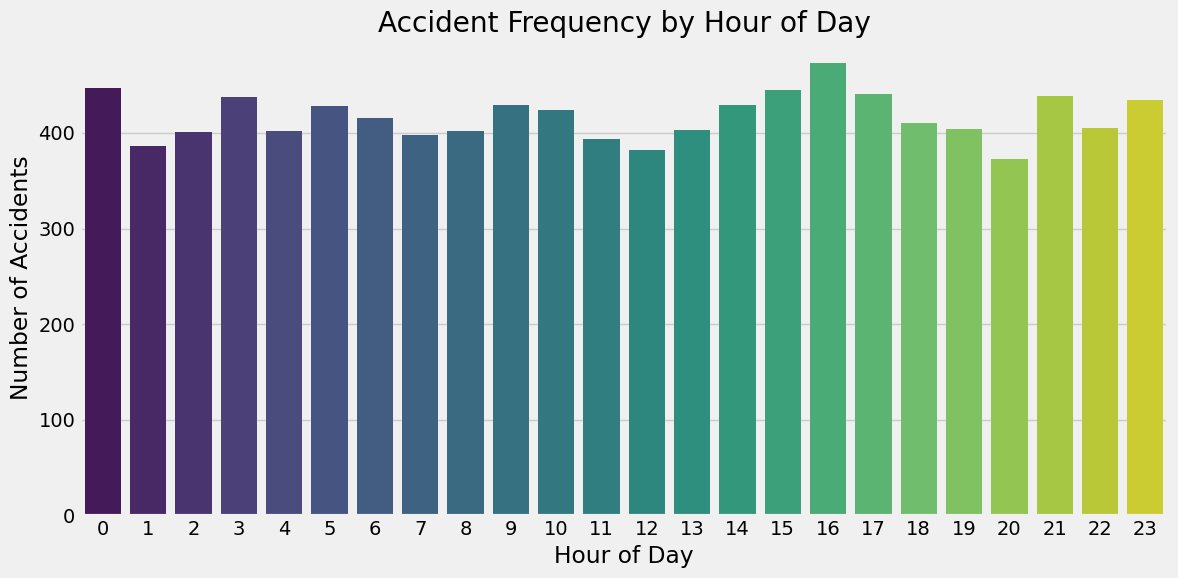

In [6]:
# 1. Time of Day Analysis - Accident Frequency by Hour
plt.figure(figsize=(12, 6))
hourly_accidents = accidents['Hour'].value_counts().sort_index()
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette='viridis')
plt.title('Accident Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

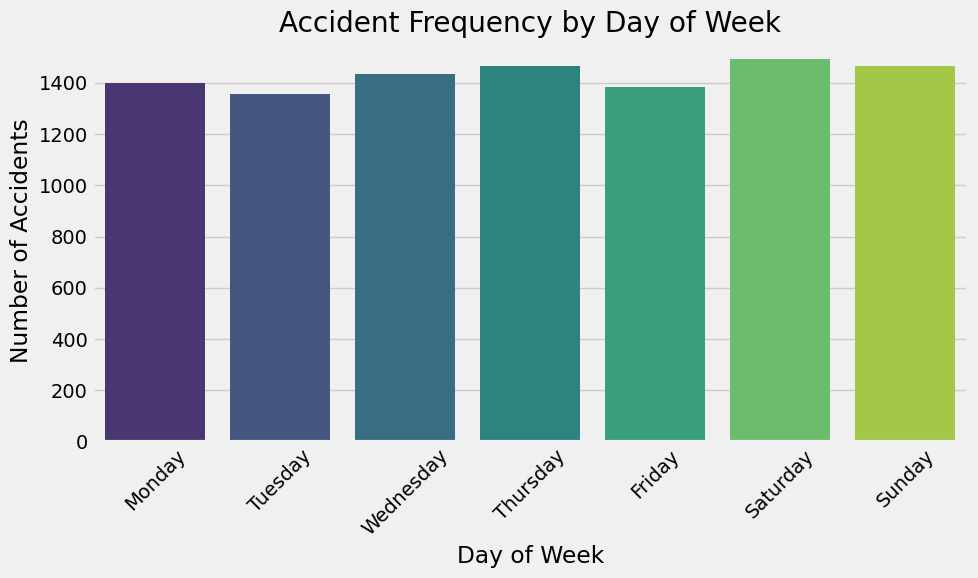

In [7]:
# 2. Day of Week Analysis
plt.figure(figsize=(10, 6))
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_accidents = accidents['Weekday'].value_counts().sort_index()
sns.barplot(x=weekday_names, y=weekday_accidents.values, palette='viridis')
plt.title('Accident Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

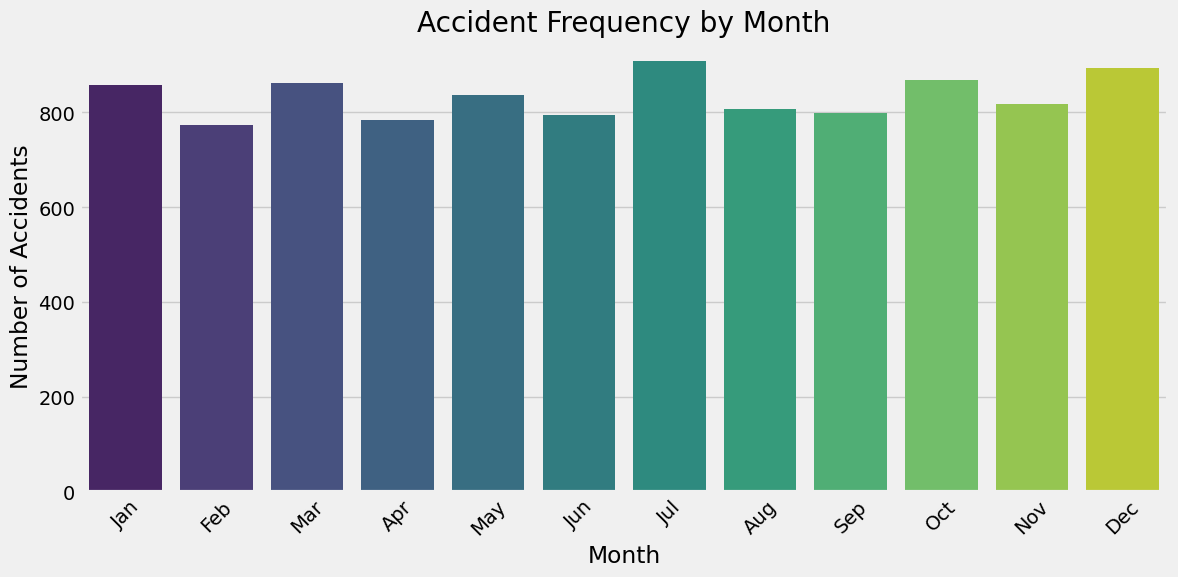

In [8]:
# 3. Monthly Analysis
plt.figure(figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_accidents = accidents['Month'].value_counts().sort_index()
sns.barplot(x=month_names, y=monthly_accidents.values, palette='viridis')
plt.title('Accident Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

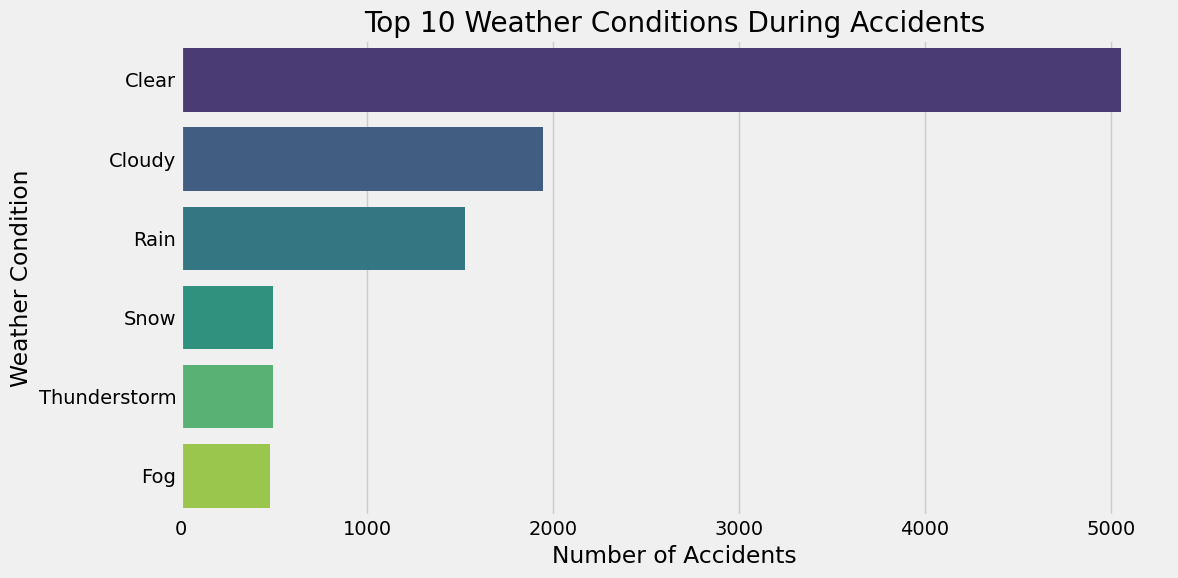

In [9]:
# 4. Weather Condition Analysis
plt.figure(figsize=(12, 6))
weather_accidents = accidents['Weather_Condition'].value_counts().head(10)
sns.barplot(x=weather_accidents.values, y=weather_accidents.index, palette='viridis')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

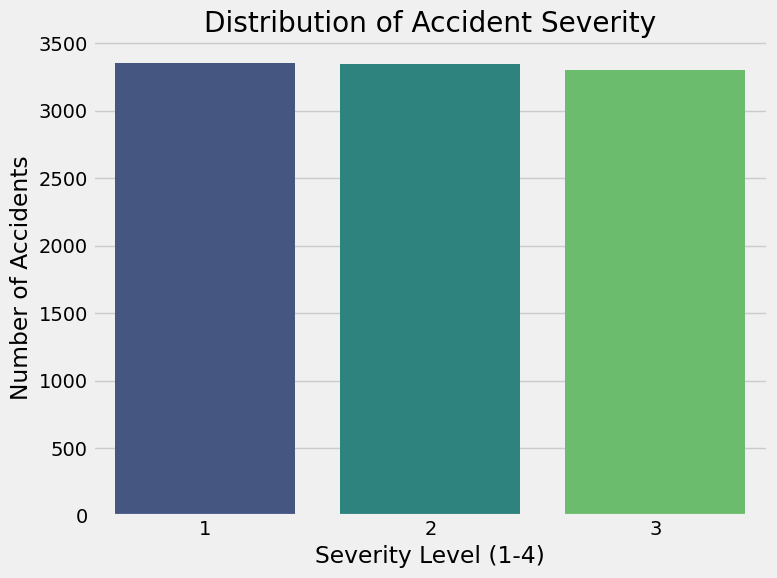

In [10]:
# 5. Accident Severity Distribution
plt.figure(figsize=(8, 6))
severity_counts = accidents['Severity'].value_counts().sort_index()
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level (1-4)')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

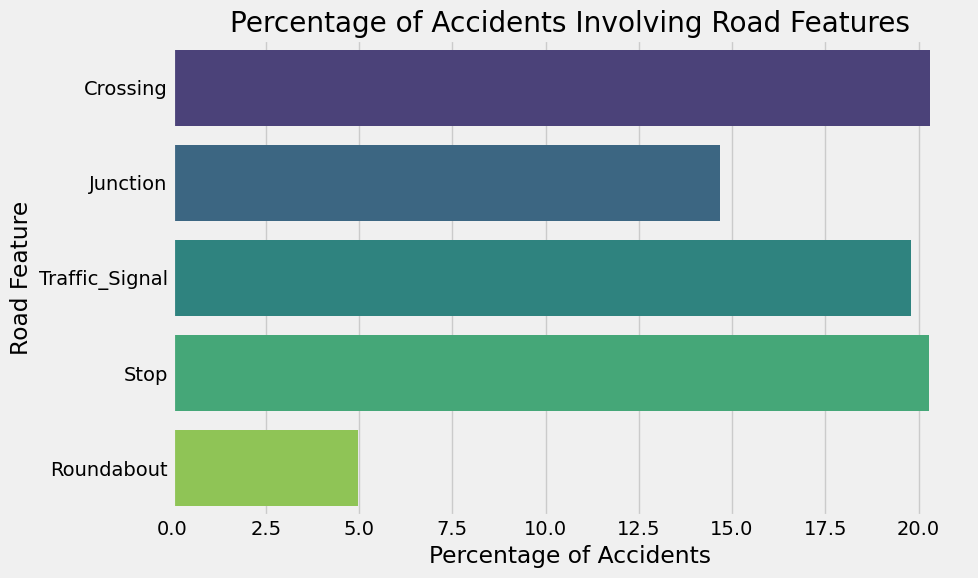

In [11]:
# 6. Road Conditions Analysis - Crossings, Junctions, Signals, etc.
road_features = ['Crossing', 'Junction', 'Traffic_Signal', 'Stop', 'Roundabout']
road_data = []

for feature in road_features:
    road_data.append({
        'Feature': feature,
        'Accident_Count': accidents[accidents[feature] == True].shape[0],
        'Percentage': accidents[accidents[feature] == True].shape[0] / accidents.shape[0] * 100
    })

road_df = pd.DataFrame(road_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Feature', data=road_df, palette='viridis')
plt.title('Percentage of Accidents Involving Road Features')
plt.xlabel('Percentage of Accidents')
plt.ylabel('Road Feature')
plt.tight_layout()
plt.show()

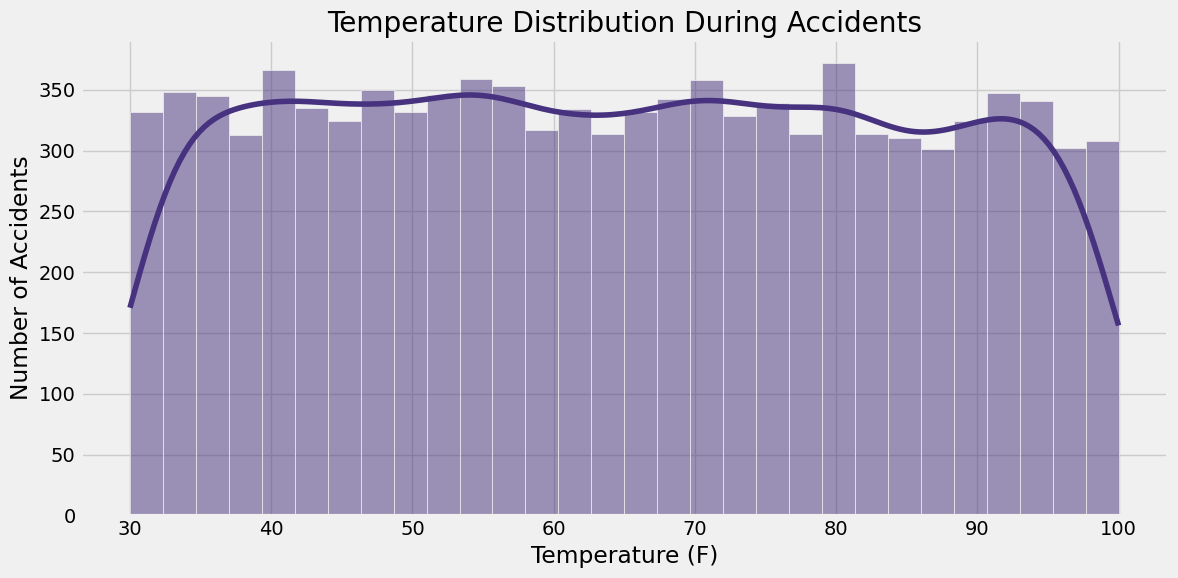

In [12]:
# 7. Temperature vs Accident Frequency
plt.figure(figsize=(12, 6))
sns.histplot(accidents['Temperature(F)'], bins=30, kde=True)
plt.title('Temperature Distribution During Accidents')
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

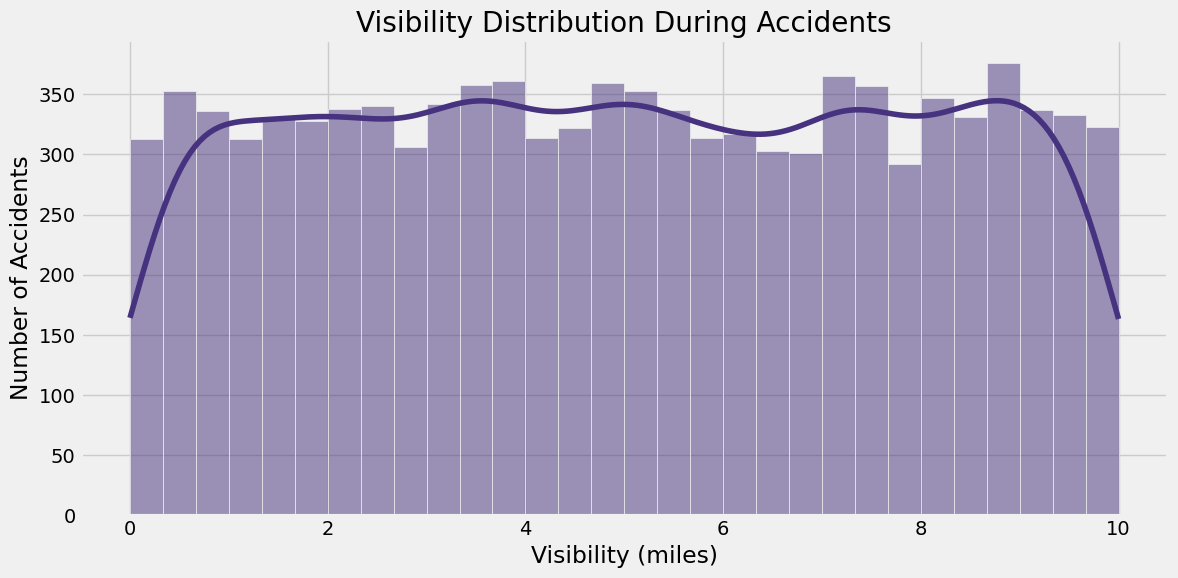

In [13]:
# 8. Visibility vs Accident Frequency
plt.figure(figsize=(12, 6))
sns.histplot(accidents['Visibility(mi)'], bins=30, kde=True)
plt.title('Visibility Distribution During Accidents')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

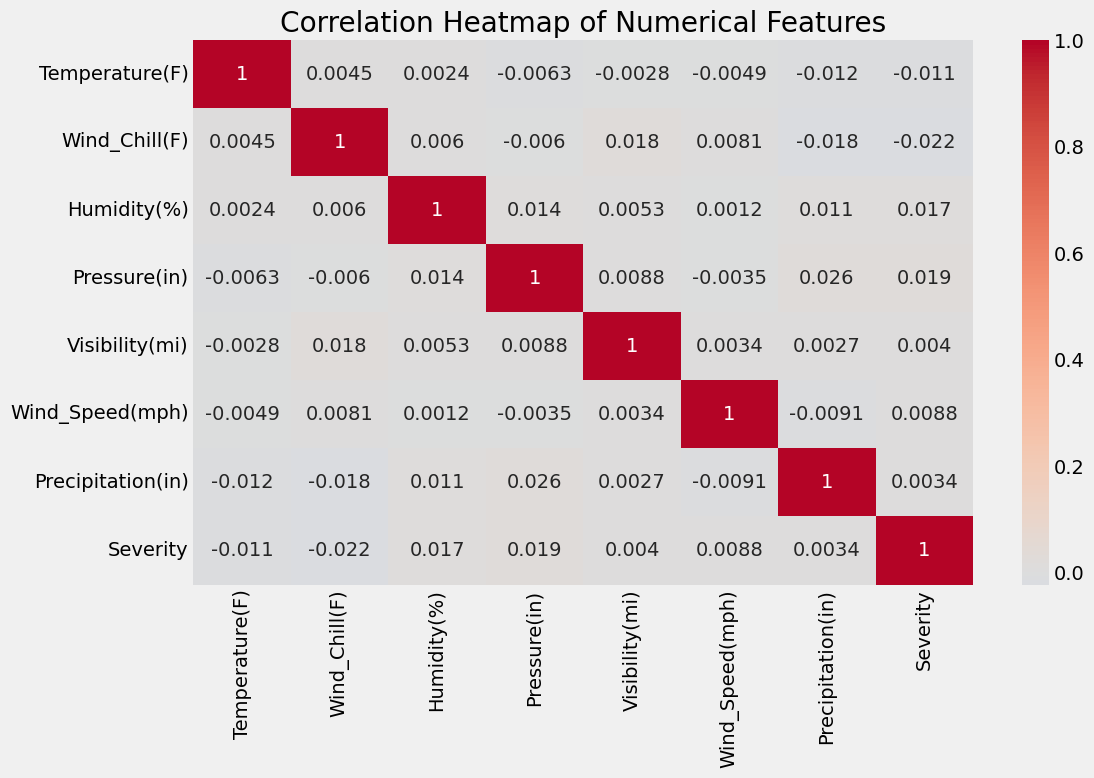

In [14]:
# 9. Correlation Heatmap of Numerical Features
numerical_features = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                      'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Severity']

plt.figure(figsize=(12, 8))
correlation_matrix = accidents[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [15]:
# 10. Accident Hotspots - Geographical Distribution
# Create a base map
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add accident points
for _, row in accidents.sample(1000).iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=2,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(california_map)

# Display the map
california_map

In [16]:
# 11. Heatmap of Accident Density
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in accidents.sample(2000).iterrows()]

california_heatmap = folium.Map(location=[36.7783, -119.4179], zoom_start=6)
HeatMap(heat_data).add_to(california_heatmap)

california_heatmap

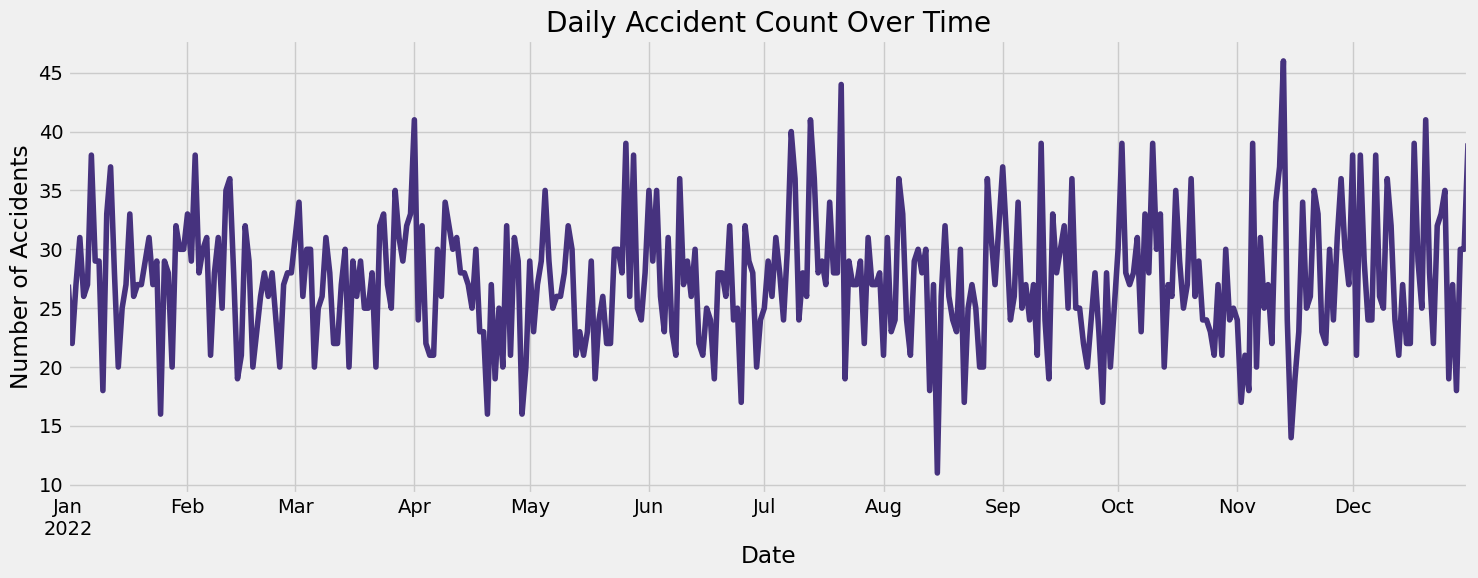

In [17]:
# 12. Time Series Analysis of Accidents
daily_accidents = accidents.resample('D', on='Start_Time').size()

plt.figure(figsize=(15, 6))
daily_accidents.plot()
plt.title('Daily Accident Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

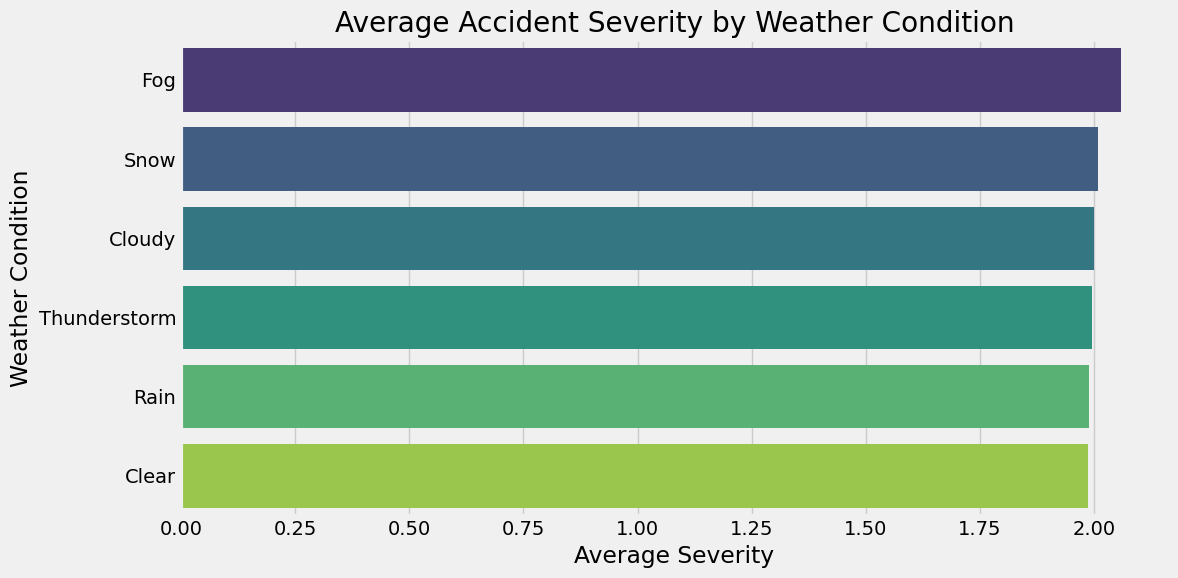

In [18]:
# 13. Accident Severity by Weather Condition
plt.figure(figsize=(12, 6))
weather_severity = accidents.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=weather_severity.values, y=weather_severity.index, palette='viridis')
plt.title('Average Accident Severity by Weather Condition')
plt.xlabel('Average Severity')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

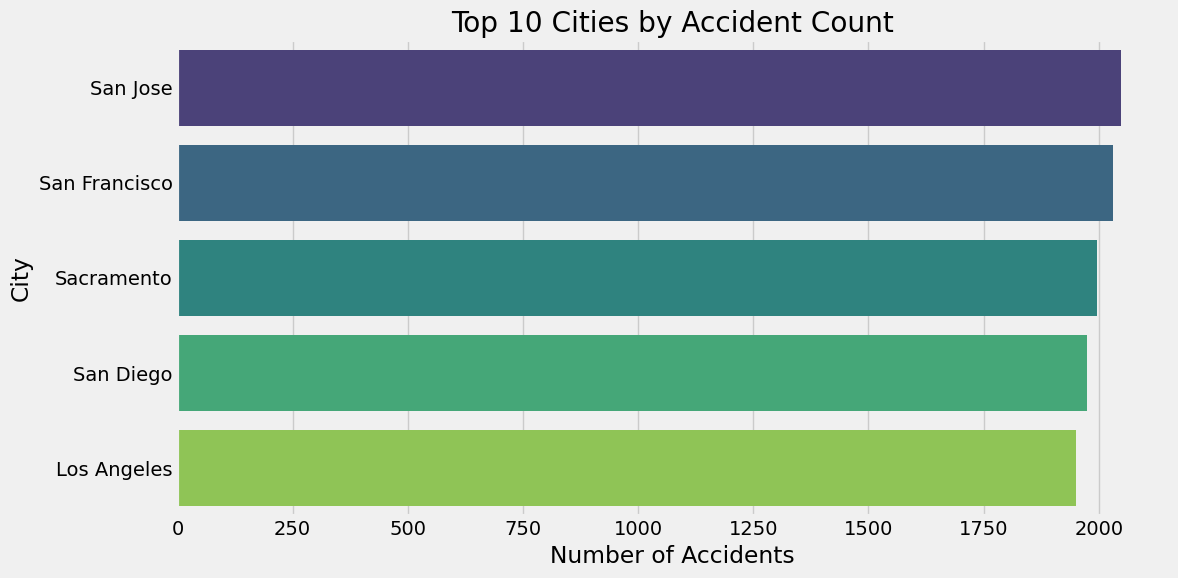

In [19]:
# 14. Accident Count by City
plt.figure(figsize=(12, 6))
city_accidents = accidents['City'].value_counts().head(10)
sns.barplot(x=city_accidents.values, y=city_accidents.index, palette='viridis')
plt.title('Top 10 Cities by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.tight_layout()
plt.show()

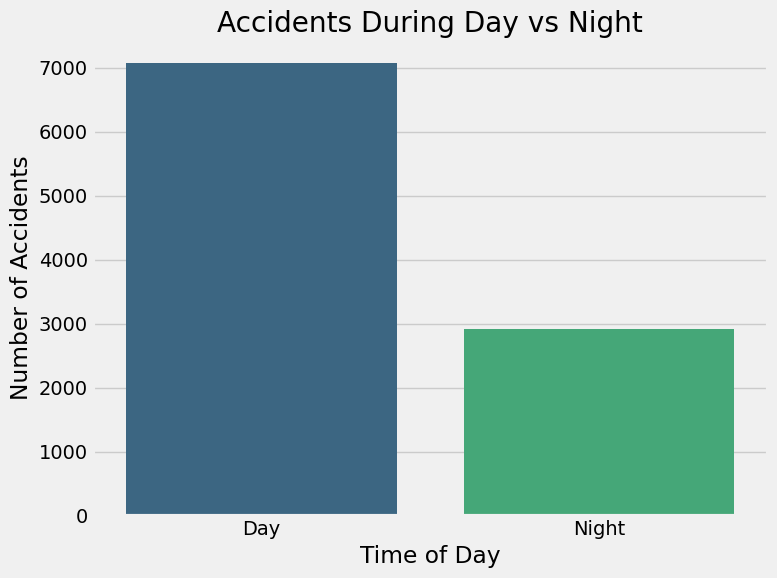

In [20]:
# 15. Day vs Night Accident Comparison
plt.figure(figsize=(8, 6))
day_night = accidents['Sunrise_Sunset'].value_counts()
sns.barplot(x=day_night.index, y=day_night.values, palette='viridis')
plt.title('Accidents During Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

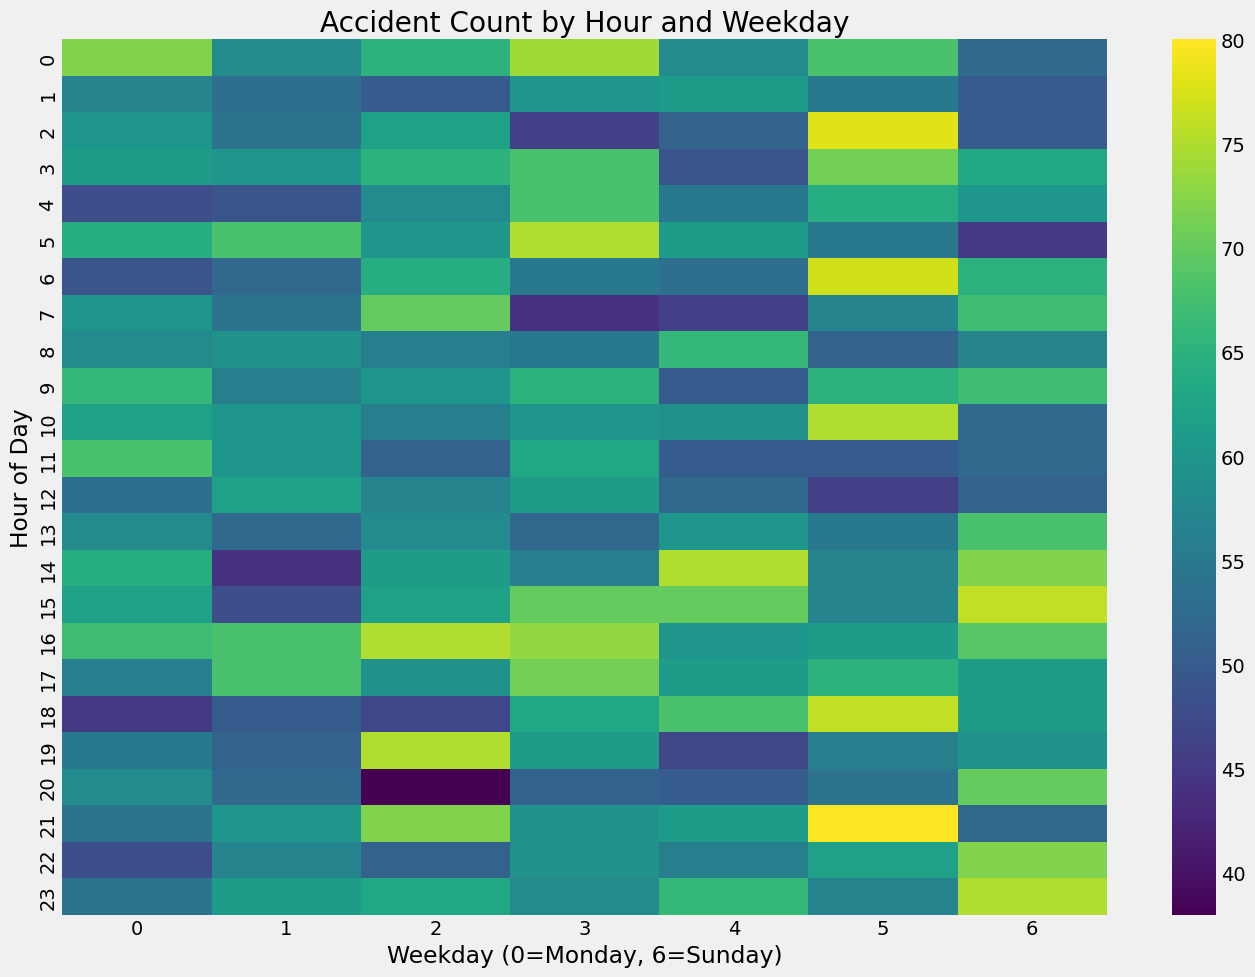

In [21]:
# 16. Advanced Analysis: Multiple Factor Visualization
# Create a pivot table for hour vs weekday accident counts
pivot_table = accidents.pivot_table(
    index='Hour',
    columns='Weekday',
    values='ID',
    aggfunc='count'
)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=False)
plt.title('Accident Count by Hour and Weekday')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

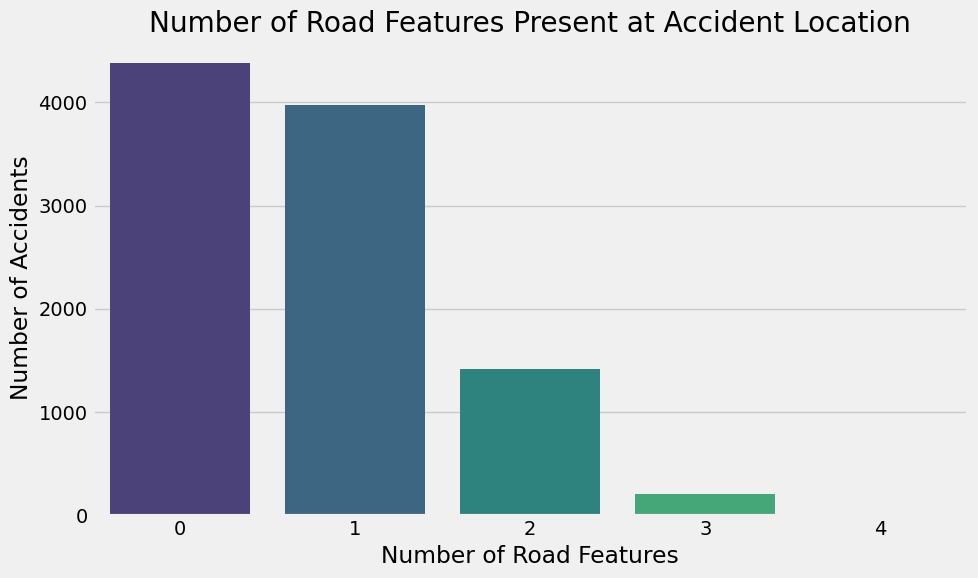

In [22]:
# 17. Road Feature Combinations Analysis
# Create a new feature that combines multiple road conditions
accidents['Road_Features'] = accidents['Crossing'].astype(int) + \
                            accidents['Junction'].astype(int) + \
                            accidents['Traffic_Signal'].astype(int) + \
                            accidents['Stop'].astype(int)

plt.figure(figsize=(10, 6))
road_feature_counts = accidents['Road_Features'].value_counts().sort_index()
sns.barplot(x=road_feature_counts.index, y=road_feature_counts.values, palette='viridis')
plt.title('Number of Road Features Present at Accident Location')
plt.xlabel('Number of Road Features')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

In [23]:
# 18. Statistical Summary of Key Findings
print("KEY FINDINGS SUMMARY")
print("=" * 50)

# Time patterns
peak_hour = accidents['Hour'].value_counts().idxmax()
print(f"Peak accident hour: {peak_hour}:00")

peak_weekday = accidents['Weekday'].value_counts().idxmax()
print(f"Peak accident weekday: {weekday_names[peak_weekday]}")

# Weather patterns
common_weather = accidents['Weather_Condition'].value_counts().idxmax()
print(f"Most common weather condition: {common_weather}")

# Severity patterns
avg_severity = accidents['Severity'].mean()
print(f"Average accident severity: {avg_severity:.2f}")

# Road features
crossing_percentage = (accidents['Crossing'].sum() / len(accidents)) * 100
print(f"Percentage of accidents at crossings: {crossing_percentage:.2f}%")

junction_percentage = (accidents['Junction'].sum() / len(accidents)) * 100
print(f"Percentage of accidents at junctions: {junction_percentage:.2f}%")

# Day vs night
day_percentage = (accidents['Sunrise_Sunset'].value_counts()['Day'] / len(accidents)) * 100
print(f"Percentage of accidents during daytime: {day_percentage:.2f}%")

KEY FINDINGS SUMMARY
Peak accident hour: 16:00
Peak accident weekday: Saturday
Most common weather condition: Clear
Average accident severity: 1.99
Percentage of accidents at crossings: 20.31%
Percentage of accidents at junctions: 14.68%
Percentage of accidents during daytime: 70.76%
